<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Simulation of Volterra Heston models made simple? </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong>  </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The integrated Volterra square-root process</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider an non-decreasing Volterra process $X$ of the form:
$$
X_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (b X_sds + c W_{X_s} ds) 
$$
where  $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$) $  c \geq 0$ and $b \in \mathbb R$, $W_t$ is a standard Brownian motion and $g_0$ a suitable input curve. We will take:
$$ g_0(t) = V_0 + a \int_0^t K(r)dr, $$
with $a,V_0 \geq 0$. 

If $K\in L^2([0,T])$, then one can show using stochastic Fubini's theorem that $X$ is absolutely continuous with respect to the Lebesgue measure, i.e. $X = \int_0^{\cdot} V_s ds$ almost surely, and that the nonnegative density process $V$ satisfies a square-root stochastic Volterra equation in the form 
$$ V_t = g_0(t) + \int_0^t K(t-s) (b V_s ds + c\sqrt{V_s}dW_s). $$

In particular for the fractional kernel 
$$ K_H(t) = \frac{1}{\Gamma(H+0.5)}t^{H-1/2}, $$
with $H \in (0,1/2]$ one recovers the rough square-root process used for instance to model the instanteneous variance of a stock.  In this case, $X$ plays the role of the integrated variance. 

If $H \in (-1/2,0]$, $K_H$ is no longer in $L^2$ but only in $L^1$ but still the equation for $X$ makes sense, but $X$ is no longer absolutely continuous with respect to the Lebsegue measure, and the process $V$ no longer makes sense. 

In the sequel, we will develop a simple scheme to simulate $X$ for any kernel $K \in L^1([0,T])$. We won't bother with the process $V$.  The difficult part is to construct a scheme for which $X$ is non-decreasing. 





<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define 
$$ U_{t,s} := X_s - X_t, \quad Z_{t,s}  = \int_t^s dW_{X_u}, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (bdU_{0,u} + c dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ V_s | \mathcal F_t]$ with $V$ the density process.)

Using the equation for $X$, the dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du ( b U_{t,s} + cZ_{t,s}) = \int_0^{t-s} K(u) du  ( b U_{t,s} + cZ_{t,s})
$$


This leads to the scheme
$$ 
U_{i,i+1}  = \alpha_i + b K_{i}  U_{i,i+1} + c  K_{i}   W_{U_{i,i+1}}
$$
with 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   K_i = \int_0^{t_{i+1}-t_{i}} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $X$ satisfying 
$$ (1-b K_i) X = \alpha + \sigma W_X  $$
but this is nothing than an **Inverse Gaussian** distribution 
$$ X = IG ( \alpha/(1-b K_i), (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (bdU_{{t_j},u} + c dZ_{{t_j},u}),   $$
so that an application of Fubini yields 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (bdU_{t_{j},u} + c dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1}  K_{ij}  \int_{t_{j}}^{t_{j+1}}  (bdU_{t_{j},u} + c dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  K_{ij} (b U_{t_{j},t_{j+1}} + c Z_{t_{j},t_{j+1}})   ,  $$
with 

$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme 



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$ 
First we compute $\alpha_i$ 
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   K_{ij} (b U_{j,j+1}  +  c Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and 
$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first use the expression for the integrated variance 
$$
U_{i,{i+1}}  = \alpha_i  + b K_i U_{i,i+1}   + c K_i  W_{U_{i,i+1}} .
$$
to simulate  (here we need $1-bK_i\geq 0$, but usually $b\leq 0$ so it is verified)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - b K_i}, \left(\frac{\alpha_i}{c K_i}\right)^2 \right) $$
and we set $Z_{i,i+1} = \frac{1}{c K_i}(  (1-bK_i)U_{i,i+1} - \alpha_i)$.



**TO DO:** figure out a way to recover sample paths of the variance process $V$ (when it exists) from $U$ and $Z$. 




# Comparison with the Markovian case
When $K(t)=\exp(bt)$, then one can show that $g_t(s) = E[V_s|\mathcal F_t] = V_t e^{b(t-s)} + \frac{a}{b}(1- e^{b(t-s)})$ and in this case $g_0(t) = V_0 e^{bt} +\frac{a}{b}(1- e^{b t}) $. So the expression for $g_t$ simplifies, as well as the expression for $\alpha$.  Note that $\alpha$ encodes all the non-Markovianity without additionnal information. As sanity check we implemented the scheme for the exponential kernel **simulate_exp_vectorized** below here with the full alpha as above, and compared it with the scheme we implemented previsoulsy and they match...  





# Shifted Fractional kernel
$$K_H(t)={(\epsilon + t)^{H-1/2}} , \quad H \in \mathbb R, \quad g_0(t) = V_0 + a \frac{(\epsilon + t)^{H + 0.5} - \epsilon^{H + 0.5}}{(H + 0.5 )} $$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = V_0  (t_{i+1} -t_i) +  a \frac{(\epsilon + t_{i+1})^{H + 1.5} -(\epsilon +t_i)^{H + 1.5}}{(H + 1.5 )(H + 0.5 )\Gamma(H+0.5)} - a (t_{i+1}-t_i) \frac{\epsilon^{H+0.5}}{(H+0.5)}    $$
$$  K_i = \int_0^{t_{i+1} - t_i} K(u) du = \frac{(\epsilon + t_{i+1} -t_i)^{H + 0.5} - \epsilon^{H+0.5}}{(H + 0.5 )\Gamma(H+0.5)}, \quad i =0, \ldots, n.$$
$$ K_{ij} = \int_{t_i}^{t_{i+1}} K(u - t_j) du  =  \frac{(\epsilon+t_{i+1} -t_j)^{H + 0.5} -(\epsilon+t_{i} -t_j)^{H + 0.5}  }{(H + 0.5 )\Gamma(H+0.5)}, \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n $$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad
import cmath
from scipy.optimize import bisect
from scipy.stats import norm
from scipy.linalg import expm
from scipy.special import gamma
import numba as nb
from numba import njit
from numba import complex128, float64, int64
from scipy.optimize import minimize

from py_vollib.black_scholes.implied_volatility import implied_volatility
vec_find_vol_rat = np.vectorize(implied_volatility)   #a better imp vol estimator based on P Jäckel Let's be rational

In [2]:
import os
print(os.getcwd())  
os.chdir('C:/Users/ed199/Desktop/PhD/Papers/WP - Simulation Volterra Heston')

C:\Users\ed199\Desktop\PhD\Papers\WP - Simulation Volterra Heston


In [3]:
# CASE 1 :  (a, b, c, rho, V_0, H, eps, T)
case_1  = 0.02, - 0.3, .3 , -0.7,  0.02, 0.1, 0., 1.

# CASE 3 :  (a, b, c, rho, V_0, H, eps, T)
case_2  = 0.04,  0.0, .7 , -0.7,  0.02, 0.1, 0., 1.
    
# CASE 2 :  (a, b, c, rho, V_0, H, eps, T)
case_3  = 0.04,  0.0, .7 , -0.7,  0.02, -0.3, 0., 1.

# CASE 4 :  (a, b, c, rho, V_0, H, eps, T)
case_4  = 0.04,  0.0, .9 , -0.7,  0.06, 0., 1/52, 1.

case = np.zeros([4, 8])
case[0,:], case[1,:], case[2,:], case[3,:] = case_1, case_2, case_3, case_4 

print(case)

[[ 0.02       -0.3         0.3        -0.7         0.02        0.1
   0.          1.        ]
 [ 0.04        0.          0.7        -0.7         0.02        0.1
   0.          1.        ]
 [ 0.04        0.          0.7        -0.7         0.02       -0.3
   0.          1.        ]
 [ 0.04        0.          0.9        -0.7         0.06        0.
   0.01923077  1.        ]]


In [5]:
def inverse_gaussian_sample_vectorized(mu, lambda_, x_n, x_u):
    """
    Vectorized version of the inverse Gaussian sampling function.
    """
    y = x_n ** 2  # std normal squared
    x = mu + (mu ** 2 * y) / (2 * lambda_) - (mu / (2 * lambda_)) * np.sqrt(4 * mu * lambda_ * y + mu ** 2 * y ** 2)
    condition = x_u <= mu / (mu + x)
    samples = np.where(condition, x, (mu ** 2) / x)
    return samples 



def simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps=0., S_0=1.):
    #discretize time
    dt = T / n_steps
    
    #pre-compute certain quantities indepenendt of i and m
    K_int_dt = ((eps + dt)**(H + 0.5) - (eps)**(H + 0.5))/ (( H + 0.5) * gamma( H + 0.5 ))
    a_H      = a*(dt)**( H + 1.5 )/(  ( H + 0.5)*( H + 1.5) * gamma( H + 0.5 ) ) 
    a_eps    = a*dt*eps**(H+0.5)/((H+0.5)*gamma( H + 0.5 ))
    sigma    = c * K_int_dt
    rho_bar = np.sqrt(1 - rho * rho)
    
    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_steps).reshape(-1, 1)
    j_indices = np.arange(n_steps).reshape(1, -1)

    K_matrix = np.maximum(eps / dt + 1 + i_indices - j_indices, 0)**(H + 0.5) - np.maximum(eps / dt + i_indices - j_indices, 0)**(H + 0.5)
    K_matrix = np.tril(K_matrix, k=-1)  # Retain only the (strictly k=-1) lower triangular part
    K_matrix *= dt**(H + 0.5) / ((H + 0.5)*gamma( H + 0.5 ))

    
    #Initialize logS
    logS = np.zeros(n_paths)
    #V = V_0*np.ones(n_paths)
    U = np.zeros(n_paths)
    
    #Need to stock the Z, U now because of non-markovianity
    Z, dU = np.zeros((n_steps, n_paths)), np.zeros((n_steps, n_paths))
    
    for i in range(n_steps):
        
        tilde_alpha_i = V_0 * dt + a_H*( ( eps/dt +  i + 1 )**( H + 1.5 )   - (eps/dt + i)**( H + 1.5 )) - a_eps
        alpha_i = tilde_alpha_i + c * K_matrix[i, : ] @ Z + b * K_matrix[i, : ] @ dU
        mu = alpha_i / ( 1 - b * K_int_dt)
        lambda_ = (alpha_i / sigma)**2
        
        dU_i = inverse_gaussian_sample_vectorized(mu, lambda_, x_norm[i,:n_paths], x_uniform[i,:n_paths])
        Z_i   = (1. / sigma) * ( (1- b*K_int_dt)*dU_i - alpha_i)
        
        logS = logS - 0.5 * dU_i + rho * Z_i + rho_bar * np.sqrt(dU_i) * x_norm2[i,:n_paths]           
        U = U + dU_i
        
        Z[i, :] = Z_i.T
        dU[i, :] = dU_i.T
        
    
    return (S_0*np.exp(logS),  U, Z, dU)


In [6]:
def simulate_explicit_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps=0., S_0=1.):
    #discretize time
    dt = T / n_steps
    
    #pre-compute certain quantities indepenendt of i and m
    K_int_dt = ((eps + dt)**(H + 0.5) - (eps)**(H + 0.5))/ (( H + 0.5) * gamma( H + 0.5 ))
    a_H      = a*(dt)**( H + 1.5 )/(  ( H + 0.5)*( H + 1.5) * gamma( H + 0.5 ) ) 
    a_eps    = a*dt*eps**(H+0.5)/((H+0.5)*gamma( H + 0.5 ))
    sigma    = c * K_int_dt
    rho_bar = np.sqrt(1 - rho * rho)
    
    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_steps).reshape(-1, 1)
    j_indices = np.arange(n_steps).reshape(1, -1)

    K_matrix = np.maximum(eps / dt + 1 + i_indices - j_indices, 0)**(H + 0.5) - np.maximum(eps / dt + i_indices - j_indices, 0)**(H + 0.5)
    K_matrix = np.tril(K_matrix, k=-1)  # Retain only the (strictly k=-1) lower triangular part
    K_matrix *= dt**(H + 0.5) / ((H + 0.5)*gamma( H + 0.5 ))

    
    #Initialize logS
    logS = np.zeros(n_paths)
    #V = V_0*np.ones(n_paths)
    U = np.zeros(n_paths)
    
    #Need to stock the Z, U now because of non-markovianity
    Z, dU = np.zeros((n_steps, n_paths)), np.zeros((n_steps, n_paths))
    
    for i in range(n_steps):
        
        tilde_alpha_i = V_0 * dt + a_H*( ( eps/dt +  i + 1 )**( H + 1.5 )   - (eps/dt + i)**( H + 1.5 )) - a_eps
        alpha_i = tilde_alpha_i + c * K_matrix[i, : ] @ Z + b * K_matrix[i, : ] @ dU
        
        dU_i = alpha_i
        Z_i   = np.sqrt(np.maximum(dU_i,0))*x_norm[i,:n_paths]
        
        logS = logS - 0.5 * np.maximum(dU_i,0.) + rho * Z_i + rho_bar * np.sqrt(np.maximum(dU_i,0.)) * x_norm2[i,:n_paths]           
        U = U + dU_i
        
        Z[i, :] = Z_i.T
        dU[i, :] = dU_i.T
        
    
    return (S_0*np.exp(logS),  U, Z, dU)



$$
dS_t = S_t \sqrt{V_t} dB_t,
$$
$$
V_t = V_0 + \frac{1}{\Gamma(H+\frac{1}{2})}\int_0^t (t-s)^{H-\frac{1}{2}}(a-\kappa V_s)ds + \frac{1}{\Gamma(H+\frac{1}{2})}\int_0^t (t-s)^{H-\frac{1}{2}} \eta\sqrt{V_s}dW_s, \quad d<W, B>_t = \rho dt
$$
Compute char function by Adams method
$$ \varphi_{\text{H}}(z,u) = \mathbb E\left[ \exp\left( u \log S_T + z \int_0^T V_s ds \right) \right]$$


$$ \psi(t) = \int_0^tK(t-s) F(\psi(s)) ds, \quad F(x) = 0.5*(u^2 -u ) + w + (b + \rho c u) x + 0.5*c^2*x^2$$ 

In [70]:
# Implicit scheme Riccati : 

def volterra_riccati_vectorized(u, w, H, a, b, c, rho, V_0, T, n_scheme_steps, eps=0., S_0= 1.):
    #discretize time
    dt = T / n_scheme_steps
    
    #pre-compute certain quantities indepenendt of i and m
    K_int_dt = ((eps + dt)**(H + 0.5) - (eps)**(H + 0.5))/ (( H + 0.5) * gamma( H + 0.5 ))
    a_H      = a*(dt)**( H + 1.5 )/(  ( H + 0.5)*( H + 1.5) * gamma( H + 0.5 ) ) 
    a_eps    = a*dt*eps**(H+0.5)/((H+0.5)*gamma( H + 0.5 ))
    sigma    = c * K_int_dt

    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_scheme_steps).reshape(-1, 1)
    j_indices = np.arange(n_scheme_steps).reshape(1, -1)

    K_matrix = np.maximum(eps / dt + 1 + i_indices - j_indices, 0)**(H + 0.5) - np.maximum(eps / dt + i_indices - j_indices, 0)**(H + 0.5)
    K_matrix = np.tril(K_matrix, k=-1)  # Retain only the (strictly k=-1) lower triangular part
    K_matrix *= dt**(H + 0.5) / ((H + 0.5)*gamma( H + 0.5 ))

    n_u = len(u)
    w_u = w + 0.5*(u*u - u) 
    b_rho = b + rho*c*u
    den   =   c*c* K_int_dt
    b_k   = 1 - b_rho*K_int_dt
    
    #Need to stock the F, psi now because of non-markovianity
    F, psi = np.zeros((n_scheme_steps, n_u))*1j, np.zeros((n_scheme_steps + 1, n_u))*1j
    log_ch = np.zeros(n_u)*1j
    
    for i in range(n_scheme_steps):
        
        beta_i =  K_matrix[i, : ] @ F
        beta_i_tilde = beta_i + w_u*K_int_dt
        
        psi_i = (b_k - np.sqrt( b_k*b_k - 2*beta_i_tilde*den )) / den
        F_i   = w_u + b_rho*psi_i + 0.5*c*c*psi_i**2
        
        
        F[i, :] = F_i
        psi[i+1, :] = psi_i
        
        int_g0_i = V_0 * dt + a_H*( ( eps/dt + n_scheme_steps - i )**( H + 1.5 )   - (eps/dt + n_scheme_steps - i  - 1)**( H + 1.5 )) - a_eps
        log_ch   = log_ch + F_i*int_g0_i
        
    return (psi, F, np.exp(log_ch))
    
    

In [71]:
def call_price_gl(S_0, K, cf, u_i, w_i):
    
    integrand = np.real(
        np.exp((1j * u_i + 0.5) * np.log(S_0 / K).reshape(-1, 1))
        * (cf)
    ) / (u_i**2 + 0.25)
    call_price = (
        S_0
        - np.sum(integrand * np.exp(u_i) * w_i, axis=1)
        * K
        / np.pi
    )
    
    return call_price

# Plot sample paths

Notice how $V$ remains non  + absorbing boundary !

In [8]:
#Generate random normals and uniforms and stock them 
random.seed(1)
NNN = 500 #steps
MMM = 10 #number of sample paths
x_norm = np.random.normal(0, 1, (NNN,MMM))
x_norm2 = np.random.normal(0, 1, (NNN,MMM))
x_uniform = np.random.uniform(0, 1, (NNN,MMM))

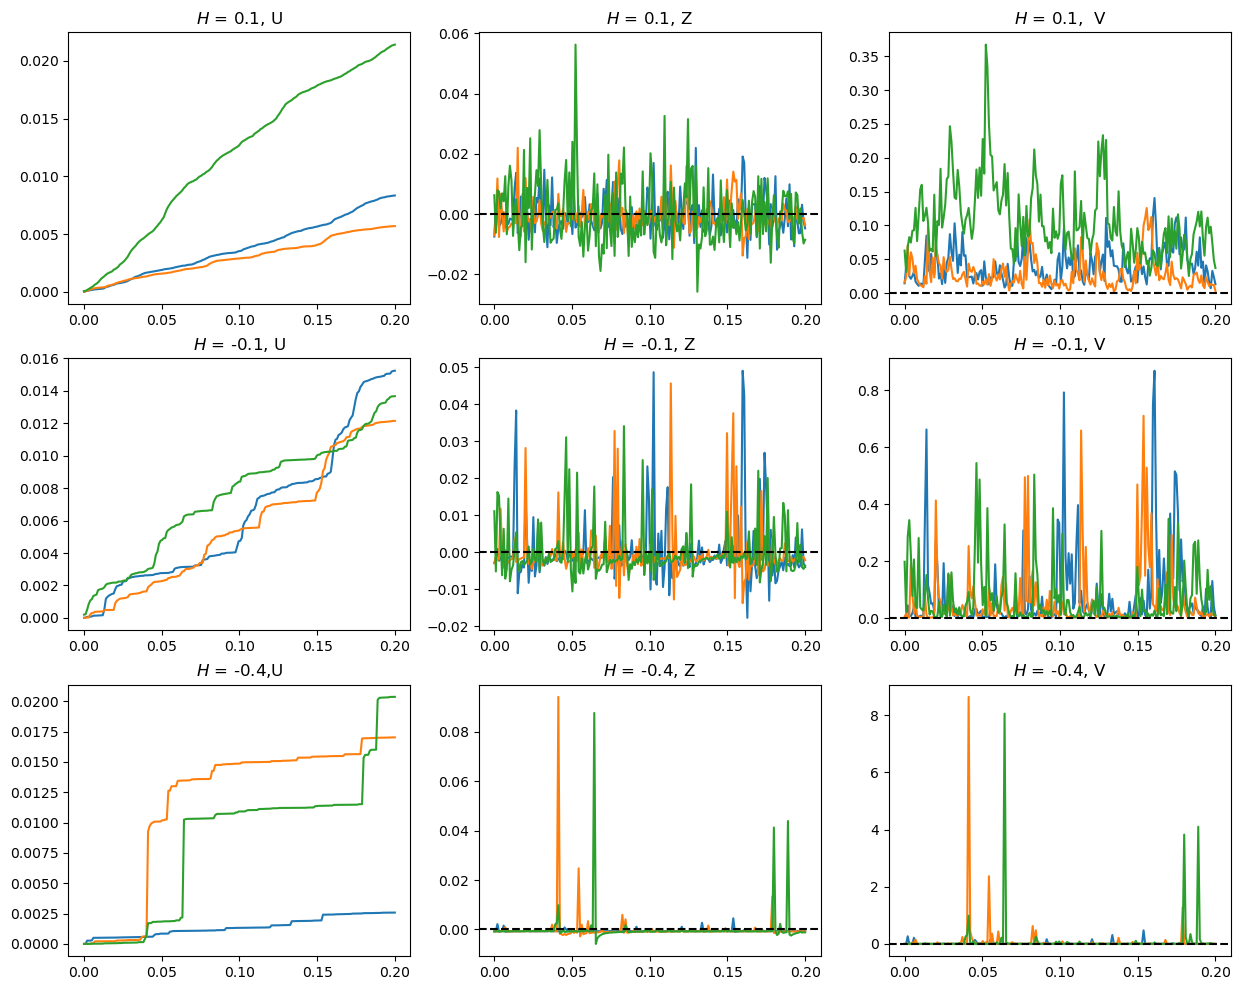

In [19]:
n_steps, n_paths = 200, 3
a, b, c, rho, V_0, H, eps, T = 0.1,  -0.3  ,  .2 , -0.7 ,  0.04,  -0.49 ,  0.  ,  1. 

T = .2
eps = 0.
H1, H2, H3 =  0.1, -0.1, -0.4

dt = T/n_steps

S1,  U1, Z1, dU1 = simulate_rough_vectorized(H1, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0=1.)
S2,  U2, Z2, dU2 = simulate_rough_vectorized(H2, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0=1.)
S3,  U3, Z3, dU3 = simulate_rough_vectorized(H3, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0=1.)


V1, V2, V3 = dU1 / dt, dU2/dt, dU3/dt
t_vec = np.linspace(0,T, n_steps)
dt = T/n_steps


fig = plt.figure(figsize=(15,12))
plt.subplot(3, 3, 3)
plt.plot(t_vec, V1[:, 0:10])
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.title(fr'$H$ = {H1},  V')
plt.subplot(3, 3, 1)
plt.plot(t_vec, np.cumsum(dU1[:, 0:10], axis=0))
plt.title(fr'$H$ = {H1}, U')
plt.subplot(3, 3, 2)
plt.plot(t_vec, Z1[:, 0:10])
plt.title(fr'$H$ = {H1}, Z')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.subplot(3, 3, 6)
plt.plot(t_vec, V2[:, 0:10])
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.title(fr'$H$ = {H2}, V')
plt.subplot(3, 3, 4)
plt.plot(t_vec, np.cumsum(dU2[:, 0:10], axis=0))
plt.title(fr'$H$ = {H2}, U')
plt.subplot(3, 3, 5)
plt.plot(t_vec, Z2[:, 0:10])
plt.title(fr'$H$ = {H2}, Z')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.subplot(3, 3, 9)
plt.plot(t_vec, V3[:, 0:10])
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.title(fr'$H$ = {H3}, V')
plt.subplot(3, 3, 7)
plt.plot(t_vec, np.cumsum(dU3[:, 0:10], axis=0))
plt.title(fr'$H$ = {H3},U')
plt.subplot(3, 3, 8)
plt.plot(t_vec, Z3[:, 0:10])
plt.title(fr'$H$ = {H3}, Z')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.savefig("Samplepaths.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Simulation of S, U, V at terminal T for different step sizes

In [107]:
#Generate random normals and uniforms and stock them 
random.seed(1)
NNN = 100 #steps
MMM = 1_000_000 #number of sample paths
#NNN = 300 #steps
#MMM = 100_000 #number of sample paths
x_norm = np.random.normal(0, 1, (NNN,MMM))
x_norm2 = np.random.normal(0, 1, (NNN,MMM))
x_uniform = np.random.uniform(0, 1, (NNN,MMM))

In [108]:
N_steps = [1, 2, 5, 10, 15, 25, 35, 50, 65, 80, 100]
n_paths = 1_000_000

In [22]:
#N_steps = [1, 2, 5, 10, 15, 25, 50, 75, 100, 200, 300, 400, 500]
N_steps = [1, 2, 5, 10, 15, 25, 50, 75, 100, 200, 300]
n_paths = 100_000

In [109]:
# ENFORCE T =  1. first 
Smat_1, Vmat_1, Umat_1 = [], [], []
Smat_EX_1, Vmat_EX_1, Umat_EX_1 = [], [], []
S_0 = 100. 
a, b, c, rho, V_0, H, eps, T = case[0]
T = 1.

for n_steps in N_steps:
    S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_1.append(S)
    Umat_1.append(U)
    S,  U, Z, dU = simulate_explicit_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_EX_1.append(S)
    Umat_EX_1.append(U)
    print(n_steps)
    
# ENFORCE T =  1. first 
Smat_2, Vmat_2, Umat_2 = [], [], []
Smat_EX_2, Vmat_EX_2, Umat_EX_2 = [], [], []
S_0 = 100. 
a, b, c, rho, V_0, H, eps, T = case[1]
T = 1.

for n_steps in N_steps:
    S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_2.append(S)
    Umat_2.append(U)
    S,  U, Z, dU = simulate_explicit_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_EX_2.append(S)
    Umat_EX_2.append(U)
    print(n_steps)

# ENFORCE T =  1. first 
Smat_3, Vmat_3, Umat_3 = [], [], []
Smat_EX_3, Vmat_EX_3, Umat_EX_3 = [], [], []
S_0 = 100. 
a, b, c, rho, V_0, H, eps, T = case[2]
T = 1.

for n_steps in N_steps:
    S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_3.append(S)
    Umat_3.append(U)
    S,  U, Z, dU = simulate_explicit_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_EX_3.append(S)
    Umat_EX_3.append(U)
    print(n_steps)
    
# ENFORCE T =  1. first 
Smat_4, Vmat_4, Umat_4 = [], [], []
Smat_EX_4, Vmat_EX_4, Umat_EX_4 = [], [], []
S_0 = 100. 
a, b, c, rho, V_0, H, eps, T = case[3]
T = 1.

for n_steps in N_steps:
    S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_4.append(S)
    Umat_4.append(U)
    S,  U, Z, dU = simulate_explicit_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)
    Smat_EX_4.append(S)
    Umat_EX_4.append(U)
    print(n_steps)

1
2
5
10
15
25
35
50
65
80
100
1
2
5
10
15
25
35
50
65
80
100
1
2
5
10
15
25
35
50
65
80
100
1
2
5
10
15
25
35
50
65
80
100


# Tests on U: mean and char fun

In [128]:
T = 1.

MC_mean_vec_1, MC_std_vec_1 = [], []
MC_EX_mean_vec_1, MC_EX_std_vec_1  = [], []

a, b, c, rho, V_0, H, eps, TT = case[0]
#ref_value_1 = V_0 * (np.exp(b * T) - 1) / b + (a / b) * ((np.exp(b * T) - 1) / b - T)
ref_value_1 =  0.028295 

for i in range(len(N_steps)):
    payoff = Umat_1[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_1.append(MC_mean)
    MC_std_vec_1.append(MC_std)
    payoff = Umat_EX_1[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_1.append(MC_mean)
    MC_EX_std_vec_1.append(MC_std)

MC_mean_vec_2, MC_std_vec_2 = [], []
MC_EX_mean_vec_2, MC_EX_std_vec_2  = [], []

a, b, c, rho, V_0, H,eps, T = case[1]
ref_value_2 = V_0 * T + (a / ((H+0.5)*gamma(H+0.5))) * ( ( (eps + T)**(H+1.5) - eps**(H+1.5)  )/(H + 1.5) - T*eps**(H+0.5))

for i in range(len(N_steps)):
    payoff = Umat_2[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_2.append(MC_mean)
    MC_std_vec_2.append(MC_std)
    payoff =  Umat_EX_2[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_2.append(MC_mean)
    MC_EX_std_vec_2.append(MC_std)

MC_mean_vec_3, MC_std_vec_3 = [], []
MC_EX_mean_vec_3, MC_EX_std_vec_3  = [], []

a, b, c, rho, V_0, H,eps, T = case[2]
ref_value_3 = V_0 * T + (a / ((H + 0.5)*gamma( H + 0.5))) * ( ( (eps + T)**(H+1.5) - eps**(H+1.5)  )/(H + 1.5) - T*eps**(H+0.5))

for i in range(len(N_steps)):
    payoff = Umat_3[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_3.append(MC_mean)
    MC_std_vec_3.append(MC_std)
    payoff =  Umat_EX_3[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_3.append(MC_mean)
    MC_EX_std_vec_3.append(MC_std)
    
MC_mean_vec_4, MC_std_vec_4 = [], []
MC_EX_mean_vec_4, MC_EX_std_vec_4  = [], []

a, b, c, rho, V_0, H,eps, T = case[3]
ref_value_4 = V_0 * T + (a / ((H + 0.5)*gamma( H + 0.5))) * ( ( (eps + T)**(H+1.5) - eps**(H+1.5)  )/(H + 1.5) - T*eps**(H+0.5))

for i in range(len(N_steps)):
    payoff = Umat_4[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_4.append(MC_mean)
    MC_std_vec_4.append(MC_std)
    payoff =  Umat_EX_4[i]
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_4.append(MC_mean)
    MC_EX_std_vec_4.append(MC_std)

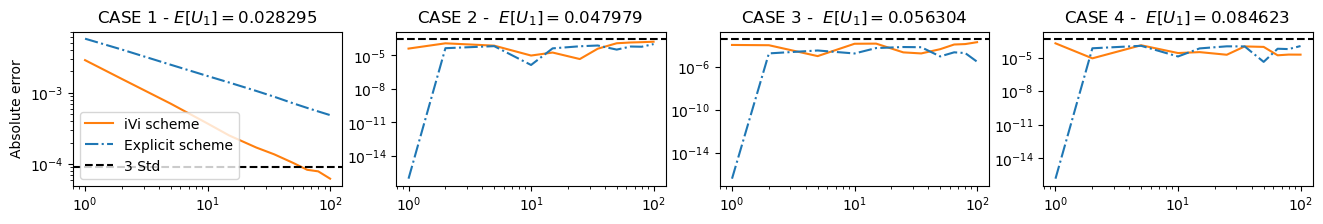

In [129]:
fig = plt.figure(figsize=(16,2))
plt.subplot(1, 4, 1)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_1) - ref_value_1), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_1) - ref_value_1), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = 'Std')
plt.title(fr"CASE 1 - $E  [U_1]=${round(ref_value_1.real,6)} ")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Absolute error')
plt.legend()
plt.subplot(1, 4, 2)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_2) - ref_value_2), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_2) - ref_value_2), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_2[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
plt.title(fr"CASE 2 -  $E [U_1]=${round(ref_value_2.real,6)} ")
plt.xscale("log")
plt.yscale("log")
plt.subplot(1, 4, 3)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_3) - ref_value_3), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_3) - ref_value_3), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
plt.title(fr"CASE 3 -  $E [U_1]=${round(ref_value_3.real,6)} ")
plt.xscale("log")
plt.yscale("log")
plt.subplot(1, 4, 4)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_4) - ref_value_4), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_4) - ref_value_4), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_4[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
plt.title(fr"CASE 4 -  $E [U_1]=${round(ref_value_4.real,6)} ")
plt.xscale("log")
plt.yscale("log")
plt.savefig("EU_2M.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [130]:
u= 1.
T = 1. 
n_scheme_steps = 10000

MC_mean_vec_1, MC_std_vec_1 = [], []
MC_EX_mean_vec_1, MC_EX_std_vec_1  = [], []

a, b, c, rho, V_0, H,eps, T = case[0]
psi,F, ch = volterra_riccati_vectorized(np.array([0.]), -u , H, a, b, c, rho, V_0, T, n_scheme_steps, eps, S_0)
ref_value_1 = ch[0].real

for i in range(len(N_steps)):
    payoff = np.exp(- u * Umat_1[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_1.append(MC_mean)
    MC_std_vec_1.append(MC_std)
    payoff = np.exp(- u * Umat_EX_1[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_1.append(MC_mean)
    MC_EX_std_vec_1.append(MC_std)

MC_mean_vec_2, MC_std_vec_2 = [], []
MC_EX_mean_vec_2, MC_EX_std_vec_2  = [], []

a, b, c, rho, V_0, H, eps, T = case[1]
psi,F, ch = volterra_riccati_vectorized(np.array([0.]), -u , H, a, b, c, rho, V_0, T, n_scheme_steps, eps, S_0)
ref_value_2 = ch[0].real

for i in range(len(N_steps)):
    payoff = np.exp(- u * Umat_2[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_2.append(MC_mean)
    MC_std_vec_2.append(MC_std)
    payoff = np.exp(- u * Umat_EX_2[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_2.append(MC_mean)
    MC_EX_std_vec_2.append(MC_std)

MC_mean_vec_3, MC_std_vec_3 = [], []
MC_EX_mean_vec_3, MC_EX_std_vec_3  = [], []

a, b, c, rho,  V_0, H, eps, T = case[2]
psi,F, ch = volterra_riccati_vectorized(np.array([0.]), -u , H, a, b, c, rho, V_0, T, n_scheme_steps, eps, S_0)
ref_value_3 = ch[0].real

for i in range(len(N_steps)):
    payoff = np.exp(- u * Umat_3[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_3.append(MC_mean)
    MC_std_vec_3.append(MC_std)
    payoff = np.exp(- u * Umat_EX_3[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_3.append(MC_mean)
    MC_EX_std_vec_3.append(MC_std)

MC_mean_vec_4, MC_std_vec_4 = [], []
MC_EX_mean_vec_4, MC_EX_std_vec_4  = [], []

a, b, c, rho,  V_0, H, eps, T = case[3]
psi,F, ch = volterra_riccati_vectorized(np.array([0.]), -u , H, a, b, c, rho, V_0, T, n_scheme_steps, eps, S_0)
ref_value_4 = ch[0].real

for i in range(len(N_steps)):
    payoff = np.exp(- u * Umat_4[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_4.append(MC_mean)
    MC_std_vec_4.append(MC_std)
    payoff = np.exp(- u * Umat_EX_4[i])
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_4.append(MC_mean)
    MC_EX_std_vec_4.append(MC_std)


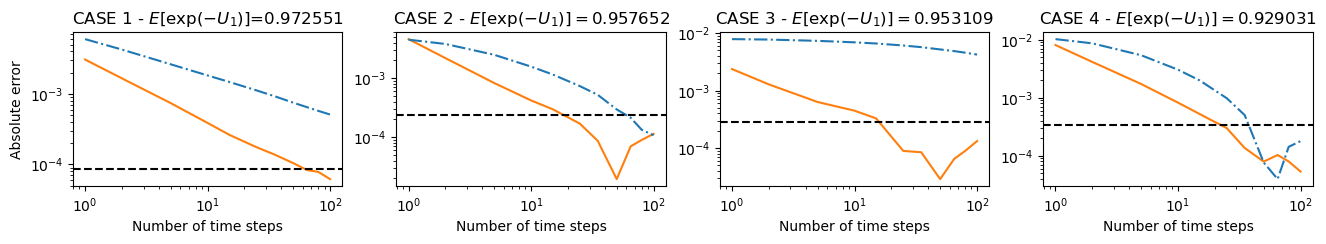

In [131]:
fig = plt.figure(figsize=(16,2))
plt.subplot(1, 4, 1)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_1) - ref_value_1),  color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_1) - ref_value_1), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = 'Std')
plt.title(fr"CASE 1 - $E [\exp(-  U_1)]$={round(ref_value_1.real,6)}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of time steps')
plt.ylabel('Absolute error')
plt.subplot(1, 4, 2)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_2) - ref_value_2), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_2) - ref_value_2), color = '#1f77b4', linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_2[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_2[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = 'Std')
plt.title(fr"CASE 2 - $E [\exp(-  U_1)]={round(ref_value_2.real,6)}$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of time steps')
plt.subplot(1, 4, 3)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_3) - ref_value_3), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_3) - ref_value_3), color = '#1f77b4', linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '1 Std')
plt.title(fr"CASE 3 - $E [\exp(-  U_1)] ={round(ref_value_3.real,6)}$")
plt.xscale("log")
plt.yscale("log")
#plt.legend()
plt.xlabel('Number of time steps')
plt.subplot(1, 4, 4)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_4) - ref_value_4), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_4) - ref_value_4), color = '#1f77b4', linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_4[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '1 Std')
plt.title(fr"CASE 4 - $E [\exp(-  U_1)] ={round(ref_value_4.real,6)}$")
plt.xscale("log")
plt.yscale("log")
#plt.legend()
plt.xlabel('Number of time steps')
plt.savefig("ExpU_2M.pdf", format='pdf', bbox_inches='tight')
plt.show()


# Call on S

In [132]:
gl_level = 150
u_i, w_i = np.polynomial.laguerre.laggauss(gl_level)
n_scheme_steps = 10000

In [133]:
S_0 = 100.
K = 100. 


MC_mean_vec_1, MC_std_vec_1 = [], []
MC_EX_mean_vec_1, MC_EX_std_vec_1  = [], []

a, b, c, rho, V_0, H, eps, T = case[0]


psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T, n_scheme_steps,eps)
call_adam = call_price_gl(S_0, np.array([K]), cf_quad, u_i, w_i)
ref_value_1 = call_adam[0]

for i in range(len(N_steps)):
    payoff = np.maximum(Smat_1[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_1.append(MC_mean)
    MC_std_vec_1.append(MC_std)
    payoff = np.maximum(Smat_EX_1[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_1.append(MC_mean)
    MC_EX_std_vec_1.append(MC_std)

a, b, c, rho, V_0, H,eps, T = case[1]
MC_mean_vec_2, MC_std_vec_2 = [], []
MC_EX_mean_vec_2, MC_EX_std_vec_2  = [], []


psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T,  n_scheme_steps, eps)
call_adam = call_price_gl(S_0, np.array([K]), cf_quad, u_i, w_i)
ref_value_2 = call_adam[0]


for i in range(len(N_steps)):
    payoff = np.maximum(Smat_2[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_2.append(MC_mean)
    MC_std_vec_2.append(MC_std)
    payoff = np.maximum(Smat_EX_2[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_2.append(MC_mean)
    MC_EX_std_vec_2.append(MC_std)

MC_mean_vec_3, MC_std_vec_3 = [], []
MC_EX_mean_vec_3, MC_EX_std_vec_3  = [], []

a, b, c, rho, V_0, H,eps, T = case[2]
psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T,  n_scheme_steps, eps)
call_adam = call_price_gl(S_0, np.array([K]), cf_quad, u_i, w_i)
ref_value_3 = call_adam[0]

for i in range(len(N_steps)):
    payoff = np.maximum(Smat_3[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_3.append(MC_mean)
    MC_std_vec_3.append(MC_std)
    payoff = np.maximum(Smat_EX_3[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_3.append(MC_mean)
    MC_EX_std_vec_3.append(MC_std)

MC_mean_vec_4, MC_std_vec_4 = [], []
MC_EX_mean_vec_4, MC_EX_std_vec_4  = [], []

    
a, b, c, rho, V_0, H,eps, T = case[3]
psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T,  n_scheme_steps, eps)
call_adam = call_price_gl(S_0, np.array([K]), cf_quad, u_i, w_i)
ref_value_4 = call_adam[0]

for i in range(len(N_steps)):
    payoff = np.maximum(Smat_4[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_mean_vec_4.append(MC_mean)
    MC_std_vec_4.append(MC_std)
    payoff = np.maximum(Smat_EX_4[i] - K, 0)
    MC_mean = np.mean(payoff)
    MC_std = np.std(payoff)
    MC_EX_mean_vec_4.append(MC_mean)
    MC_EX_std_vec_4.append(MC_std)

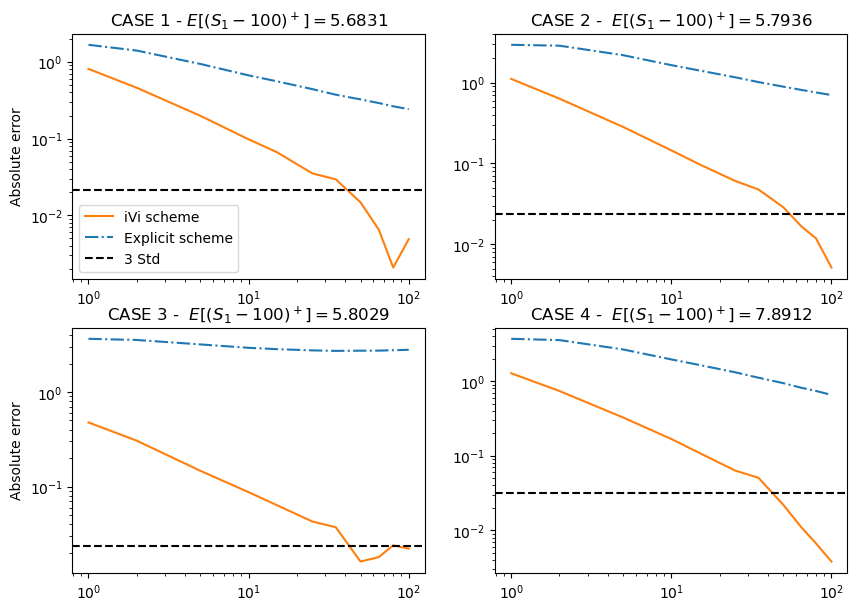

In [134]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_1) - ref_value_1), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_1) - ref_value_1),  color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_std_vec_1[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = 'Std')
plt.title(fr"CASE 1 - $E  [(S_1 - 100)^+]=${round(ref_value_1,4)}")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Absolute error')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_2) - ref_value_2), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_2) - ref_value_2), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_2[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_2[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = 'Std')
plt.title(fr"CASE 2 -  $E [(S_1 - 100)^+]=${round(ref_value_2.real,4)} ")
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 3)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_3) - ref_value_3), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_3) - ref_value_3), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '1 Std')
plt.title(fr"CASE 3 -  $E [(S_{{1}} - 100)^+]=${round(ref_value_3.real,4)}")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Absolute error')
plt.subplot(2, 2, 4)
plt.plot(N_steps, np.abs(np.array(MC_mean_vec_4) - ref_value_4), color='#ff7f0e', label = 'iVi scheme')
plt.plot(N_steps, np.abs(np.array(MC_EX_mean_vec_4) - ref_value_4), color = '#1f77b4',  linestyle = '-.', label = 'Explicit scheme')
plt.axhline(y =   3*np.array(MC_std_vec_4[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '3 Std')
#plt.axhline(y =   np.array(MC_QE_std_vec_3[-1])/np.sqrt(n_paths) , color = 'black', linestyle ='--', label = '1 Std')
plt.title(fr"CASE 4 -  $E [(S_{{1}} - 100)^+]=${round(ref_value_4.real,4)}")
plt.xscale("log")
plt.yscale("log")
#plt.legend()
#plt.savefig("ECallATM_2M.pdf", format='pdf', bbox_inches='tight')
plt.show()


# Full volatility slice

In [135]:
gl_level = 150
u_i, w_i = np.polynomial.laguerre.laggauss(gl_level)
n_scheme_steps = 10000


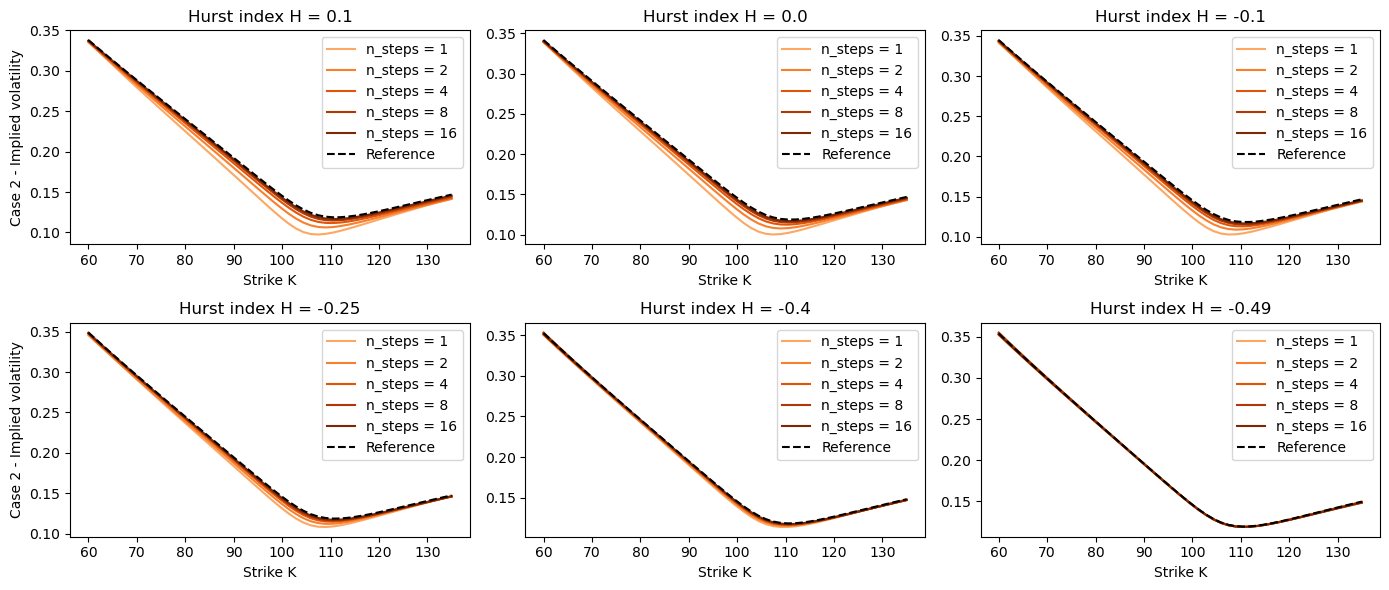

In [136]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Colormap for shades of orange

n_steps_list = [1, 2, 4, 8, 16]  # Different n_steps values
S_0 = 100
r = 0.
S0 = S_0

T = 1.
K_vec = np.linspace(60, 135, 50)

a, b, c, rho, V_0, H, eps, T = case[2]
H_vec = [0.1, 0., -0.1, -0.25, -0.4, -0.49]

# Generate shades of orange from bright to dark
colors = [cm.Oranges(i) for i in np.linspace(0.4, 1.0, len(n_steps_list))]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for j in range(len(H_vec)):  # Loop over different Hurst indices
    for idx, n_steps in enumerate(n_steps_list):  # Loop over n_steps values
        color = colors[idx]  # Assign a shade of orange

        # Simulate rough volatility paths
        S, U, Z, dU = simulate_rough_vectorized(H_vec[j], a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)

        # Compute MC implied volatilities
        MC_mean_vec = [np.mean(np.maximum(S - K, 0.)) for K in K_vec]
        MC_iv = vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')

        # Compute reference implied volatility
        psi, F, cf_quad = volterra_riccati_vectorized(1j * u_i + 0.5, 0., H_vec[j], a, b, c, rho, V_0, T, n_scheme_steps, eps)
        price_closed = call_price_gl(S_0, K_vec, cf_quad, u_i, w_i)
        iv = vec_find_vol_rat(price_closed, S_0, K_vec, T, 0.0, 'c')

        # Plot results
        axes[j].plot(K_vec, MC_iv, label=f"n_steps = {n_steps}", color=color)

    # Plot reference once (dashed black line)
    axes[j].plot(K_vec, iv, linestyle='--', label="Reference", color="black")
    axes[j].set_title(f"Hurst index H = {H_vec[j]}")
    axes[j].set_xlabel("Strike K")

    # Set y-label for leftmost plots
    if j == 0 or j == 3:
        axes[j].set_ylabel("Case 2 - Implied volatility")

    axes[j].legend()  # Add legend per subplot

plt.tight_layout()
plt.savefig("Vol_multiple_steps_shades_orange.pdf", format='pdf', bbox_inches='tight')
plt.show()

1.0
[ 60.          61.53061224  63.06122449  64.59183673  66.12244898
  67.65306122  69.18367347  70.71428571  72.24489796  73.7755102
  75.30612245  76.83673469  78.36734694  79.89795918  81.42857143
  82.95918367  84.48979592  86.02040816  87.55102041  89.08163265
  90.6122449   92.14285714  93.67346939  95.20408163  96.73469388
  98.26530612  99.79591837 101.32653061 102.85714286 104.3877551
 105.91836735 107.44897959 108.97959184 110.51020408 112.04081633
 113.57142857 115.10204082 116.63265306 118.16326531 119.69387755
 121.2244898  122.75510204 124.28571429 125.81632653 127.34693878
 128.87755102 130.40816327 131.93877551 133.46938776 135.        ]
1.0
[ 60.          61.53061224  63.06122449  64.59183673  66.12244898
  67.65306122  69.18367347  70.71428571  72.24489796  73.7755102
  75.30612245  76.83673469  78.36734694  79.89795918  81.42857143
  82.95918367  84.48979592  86.02040816  87.55102041  89.08163265
  90.6122449   92.14285714  93.67346939  95.20408163  96.73469388
  98

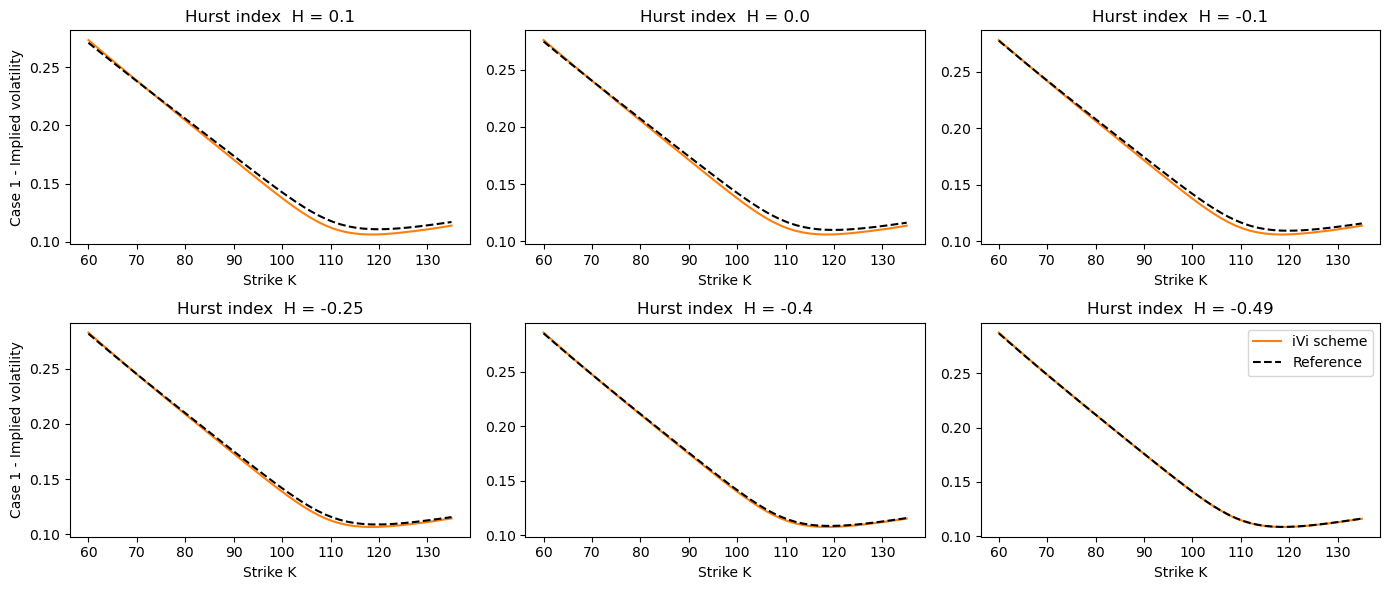

In [137]:
n_steps = 5
S_0 = 100
r = 0.
S0 = S_0

T = 1. 

K_vec = np.linspace(60, 135, 50)


a, b, c, rho, V_0, H, eps,  T = case[0]



H_vec = [0.1 , 0.,-0.1 , -0.25, - 0.4 ,-0.49]



# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()


for j in range(len(H_vec)):

    S,  U, Z, dU = simulate_rough_vectorized(H_vec[j], a, b, c, rho, V_0, T, n_steps, n_paths, eps, S_0)

   
    MC_mean_vec = []
    MC_std_vec = []

    print(T)
    print(K_vec)


    for i in range(len(K_vec)):

        K = K_vec[i]
        MC_mean = np.mean(np.maximum(S- K, 0.))
        MC_std = np.std(np.maximum(S- K, 0.))
        MC_mean_vec.append(MC_mean)
        MC_std_vec.append(MC_std)
 
    psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H_vec[j], a, b, c, rho, V_0, T,   n_scheme_steps,  eps)
    price_closed = call_price_gl(S_0, K_vec, cf_quad, u_i, w_i)
    iv = vec_find_vol_rat(price_closed, S_0, K_vec, T, 0.0, 'c')
    MC_iv = vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')
    
#    axes[j].plot(K_vec, MC_QE_iv, label = 'QE scheme', color = '#1f77b4')
    axes[j].plot(K_vec, MC_iv, label = 'iVi scheme', color='#ff7f0e')
    axes[j].plot(K_vec, iv, linestyle= '--', label = 'Reference', color = 'black')
    axes[j].set_title(f"Hurst index  H = {H_vec[j]}")
    axes[j].set_xlabel("Strike K")
    if j == 0 :
        axes[j].set_ylabel("Case 1 - Implied volatility")
    elif  j == 3 :
        axes[j].set_ylabel("Case 1 - Implied volatility")


# Adjust layout to prevent overlapping
plt.tight_layout()
plt.legend()
plt.savefig("Vol_10step.pdf", format='pdf', bbox_inches='tight')
# Show the plot
plt.show()
#     plt.show()


In [89]:
#Ref value Fourier 
K_vec = np.linspace(60., 120, 100)

T = 1. 
S_0 = 100.
r = 0.



a, b, c, rho, V_0, H, eps,  T = case[0]

psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T, n_scheme_steps)
call = call_price_gl(S_0, K_vec, cf_quad, u_i, w_i)
iv = vec_find_vol_rat(call, S_0, K_vec, T, 0.0, 'c')


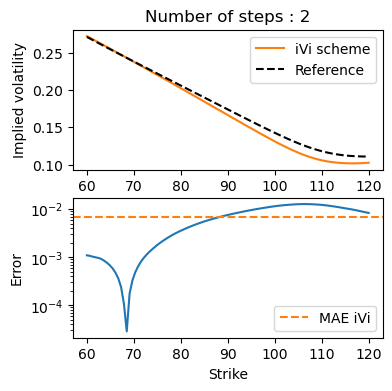

In [93]:
I = 1

MC_mean_vec = []
MC_std_vec = []
MC_EX_mean_vec = []
MC_EX_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_1[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_1[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_EX_mean = np.mean(np.maximum(Smat_EX_1[I] - K, 0.))
    MC_EX_std = np.std(np.maximum(Smat_EX_1[I] - K, 0.))
    MC_EX_mean_vec.append(MC_EX_mean)
    MC_EX_std_vec.append(MC_EX_std)

MC_iv =  vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')  
#MC_EX_iv = vec_find_vol_rat(np.array(MC_EX_mean_vec), S_0, K_vec, T, 0.0, 'c') 


nsteps = N_steps[I]


total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
#total_error_EX =  np.mean(np.abs(np.array(MC_EX_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
#plt.plot(K_vec, MC_EX_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
plt.legend()
plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
#plt.plot(K_vec, np.abs(np.array(MC_EX_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
#plt.axhline(y= total_error_EX, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
plt.legend()
plt.savefig("Vol_Case1_1.pdf", format='pdf', bbox_inches='tight')
plt.show()

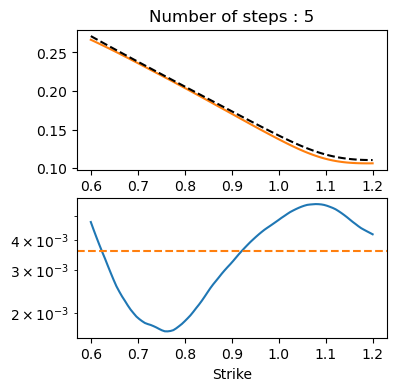

In [608]:
I = 2

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_1[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_1[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
#     MC_QE_mean = np.mean(np.maximum(Smat_QE_1[I] - K, 0.))
#     MC_QE_std = np.std(np.maximum(Smat_QE_1[I] - K, 0.))
#     MC_QE_mean_vec.append(MC_QE_mean)
#     MC_QE_std_vec.append(MC_QE_std)

MC_iv =  vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')  
#MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]


total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
#total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
#plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
#plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
#plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case1_2.pdf", format='pdf', bbox_inches='tight')
plt.show()

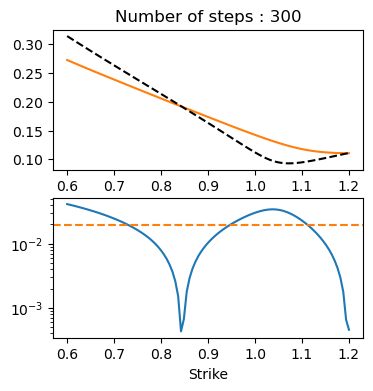

In [605]:
I = 10

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_1[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_1[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_EX_mean = np.mean(np.maximum(Smat_EX_1[I] - K, 0.))
    MC_EX_std = np.std(np.maximum(Smat_EX_1[I] - K, 0.))
    MC_EX_mean_vec.append(MC_EX_mean)
    MC_EX_std_vec.append(MC_EX_std)

MC_iv =  vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')  
#MC_EX_iv = vec_find_vol_rat(np.array(MC_EX_mean_vec), S_0, K_vec, T, 0.0, 'c')  


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
#total_error_EX =  np.mean(np.abs(np.array(MC_EX_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
#plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
#plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
#plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case1_3.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [604]:
I = 10

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_1[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_1[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_1[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_1[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]


total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_QE_iv, label = 'QE scheme')
plt.plot(K_vec, MC_iv, label = 'Our scheme')
plt.plot(K_vec, iv, label = 'Reference', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color='red',  linestyle = '--', label = 'MAE our scheme')
plt.axhline(y= total_error_QE, linestyle = '--', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Number of time steps")
#plt.legend()
plt.savefig("Vol_Case1_4.pdf", format='pdf', bbox_inches='tight')
plt.show()

IndexError: list index out of range

In [86]:
#Ref value Fourier 
K_vec = np.linspace(45, 140, 100)

T = 1. 
S_0 = 100.
r = 0.

a, b, c, rho, V_0, T = case[1]
hestonParams = -b, a,c, rho, V_0 
sig_bs = sigma_bs(hestonParams, T, eps = 10**(-5))
price_closed =  []
iv = []

for i in range(len(K_vec)):
    price_closed.append(call_CM(hestonParams, 0., T, S0, K_vec[i], sig_bs)[0])
    iv.append(implied_vol_bissection(price_closed[i], r, T, S0, K_vec[i]))


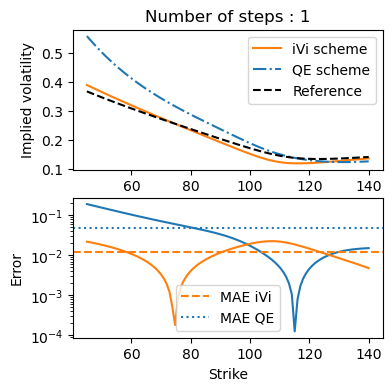

In [87]:
I = 0 

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_2[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_2[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
plt.legend()
plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
plt.legend()
plt.savefig("Vol_Case2_1.pdf", format='pdf', bbox_inches='tight')
plt.show()

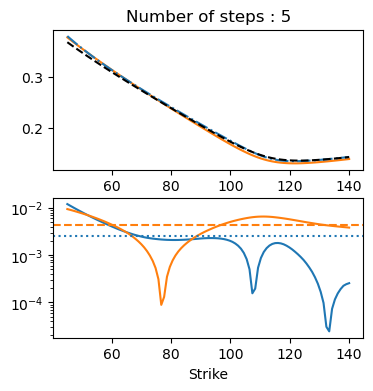

In [88]:
I = 2

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_2[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_2[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case2_2.pdf", format='pdf', bbox_inches='tight')
plt.show()

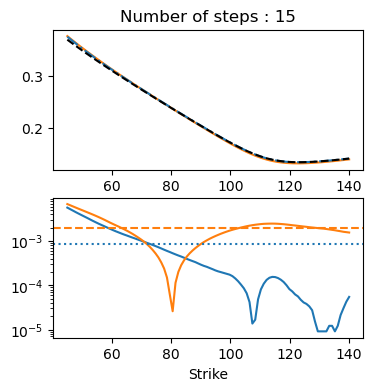

In [89]:
I = 4

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_2[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_2[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_2[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case2_3.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [609]:
#Ref value Fourier 
K_vec = np.linspace(60./100., 120/100., 100)

T = 1. 
S_0 = 1.
S0 = S_0
r = 0.



a, b, c, rho, V_0, H, eps,  T = case[2]

psi, F , cf_quad= volterra_riccati_vectorized(1j*u_i + 0.5 , 0. , H, a, b, c, rho, V_0, T, n_scheme_steps)
call_adam = call_price_gl(S_0, K_vec, cf_quad, u_i, w_i)


price_closed =  call_adam
iv = vec_find_vol_rat(call_adam, S_0, K_vec, T, 0.0, 'c')


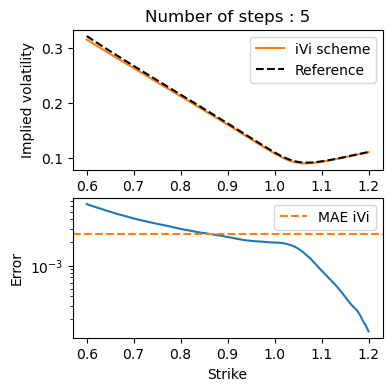

In [614]:
I = 2

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_3[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_3[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
#     MC_QE_mean = np.mean(np.maximum(Smat_QE_3_10[I] - K, 0.))
#     MC_QE_std = np.std(np.maximum(Smat_QE_3_10[I] - K, 0.))
#     MC_QE_mean_vec.append(MC_QE_mean)
#     MC_QE_std_vec.append(MC_QE_std)

MC_iv =  vec_find_vol_rat(np.array(MC_mean_vec), S_0, K_vec, T, 0.0, 'c')  
#MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
#total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
#plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
plt.legend()
plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
#plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
#plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
plt.legend()
plt.savefig("Vol_Case3_1.pdf", format='pdf', bbox_inches='tight')
plt.show()

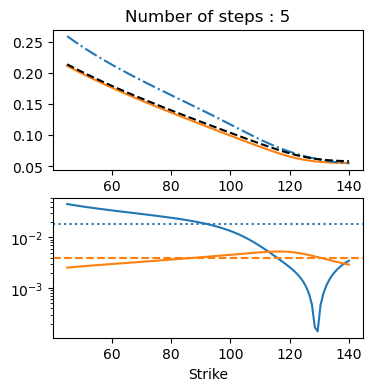

In [92]:
I = 2

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_3_10[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_3_10[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_3_10[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_3_10[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case3_2.pdf", format='pdf', bbox_inches='tight')
plt.show()

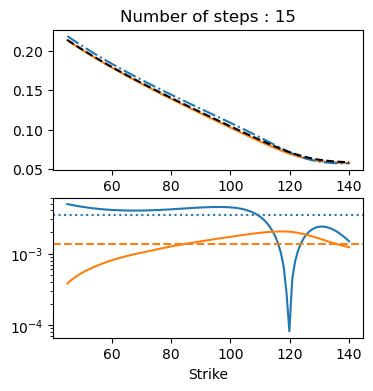

In [93]:
I = 4

MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for K in K_vec:
    MC_mean = np.mean(np.maximum(Smat_3_10[I] - K, 0.))
    MC_std = np.std(np.maximum(Smat_3_10[I] - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    MC_QE_mean = np.mean(np.maximum(Smat_QE_3_10[I] - K, 0.))
    MC_QE_std = np.std(np.maximum(Smat_QE_3_10[I] - K, 0.))
    MC_QE_mean_vec.append(MC_QE_mean)
    MC_QE_std_vec.append(MC_QE_std)

MC_iv = implied_vol_bissection(np.array(MC_mean_vec), 0., T, S0, K_vec)
MC_QE_iv = implied_vol_bissection(np.array(MC_QE_mean_vec), 0., T, S0, K_vec)


nsteps = N_steps[I]

total_error =  np.mean(np.abs(np.array(MC_iv) - iv))
total_error_QE =  np.mean(np.abs(np.array(MC_QE_iv) - iv))

fig = plt.figure(figsize=(4,4))
plt.subplot(2, 1, 1)
plt.plot(K_vec, MC_iv, color='#ff7f0e', label = 'iVi scheme')
plt.plot(K_vec, MC_QE_iv,   color = '#1f77b4',  linestyle = '-.',label = 'QE scheme')
plt.plot(K_vec, iv, label = 'Reference', linestyle = '--', color = 'black')
#plt.legend()
#plt.ylabel(f"Implied volatility")
plt.title(f"Number of steps : {nsteps}")
plt.subplot(2, 1, 2)
plt.plot(K_vec, np.abs(np.array(MC_QE_iv) - iv))
plt.plot(K_vec, np.abs(np.array(MC_iv) - iv))
plt.axhline(y= total_error, color= '#ff7f0e',  linestyle = '--', label = 'MAE iVi')
plt.axhline(y= total_error_QE, color = '#1f77b4', linestyle = ':', label = 'MAE QE')
#plt.title(f"Error in prices")
#plt.ylabel(f"Error")
plt.yscale("log")
plt.xlabel("Strike")
#plt.legend()
plt.savefig("Vol_Case3_3.pdf", format='pdf', bbox_inches='tight')
plt.show()